## step1: download the datasets from websites and laod the data using pandas library


In [1]:
## import libraries which required for project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
## step1 loading th data
df =pd.read_excel("pima-data.xlsx")
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [3]:
df.shape

(768, 12)

In [4]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose_conc   768 non-null    int64  
 2   diastolic_bp   768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes_orig  768 non-null    int64  
 9   skin           768 non-null    float64
 10  has_diabetes   768 non-null    bool   
 11  diabetes       768 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 61.6 KB


In [6]:
df.describe

<bound method NDFrame.describe of      num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age  diabetes_orig    skin  has_diabetes  diabetes  
0        0.627   50              1  1.3790  

## step2 Cleaning the datasets

In [7]:
## check null values
df.isnull().sum()

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          0
bmi              0
diab_pred        0
age              0
diabetes_orig    0
skin             0
has_diabetes     0
diabetes         0
dtype: int64

## b Remove the duplicate colums
if we want to find duplicates columns we can find correlation two columns

In [8]:
df.corr

<bound method DataFrame.corr of      num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age  diabetes_orig    skin  has_diabetes  diabetes  
0        0.627   50              1  1.3790    

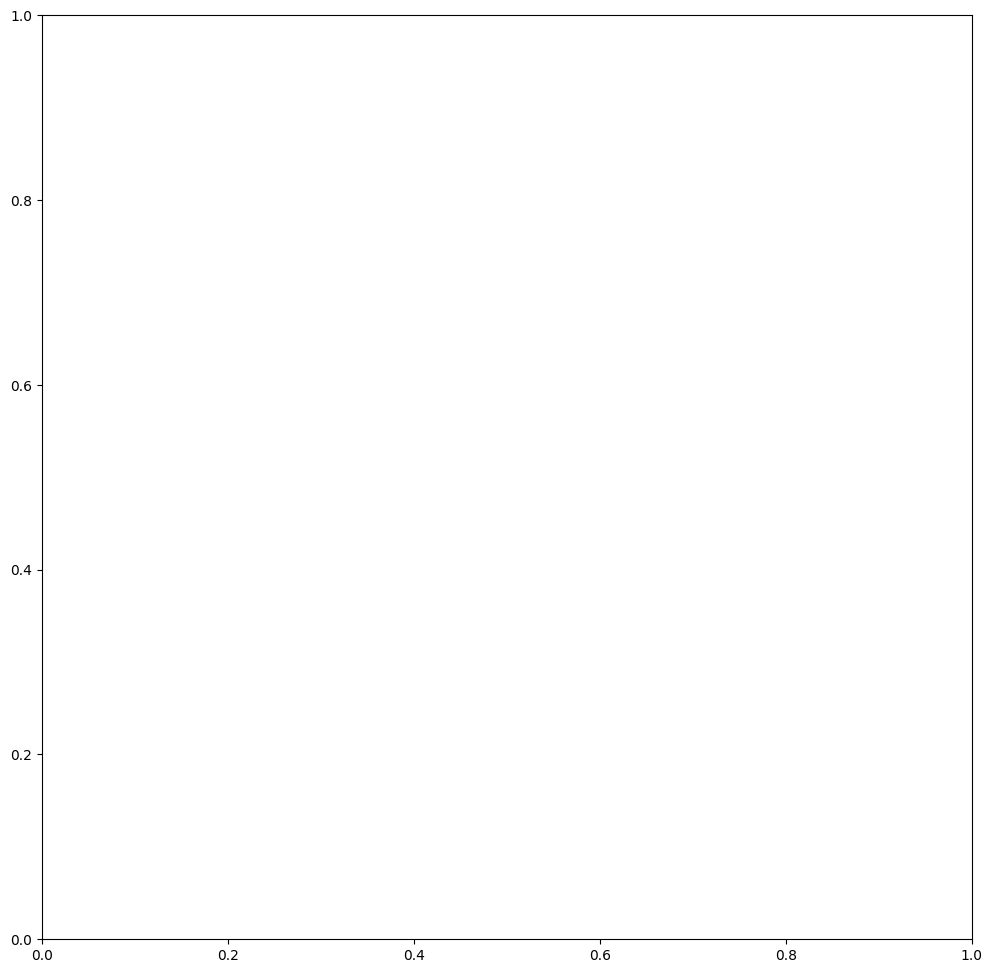

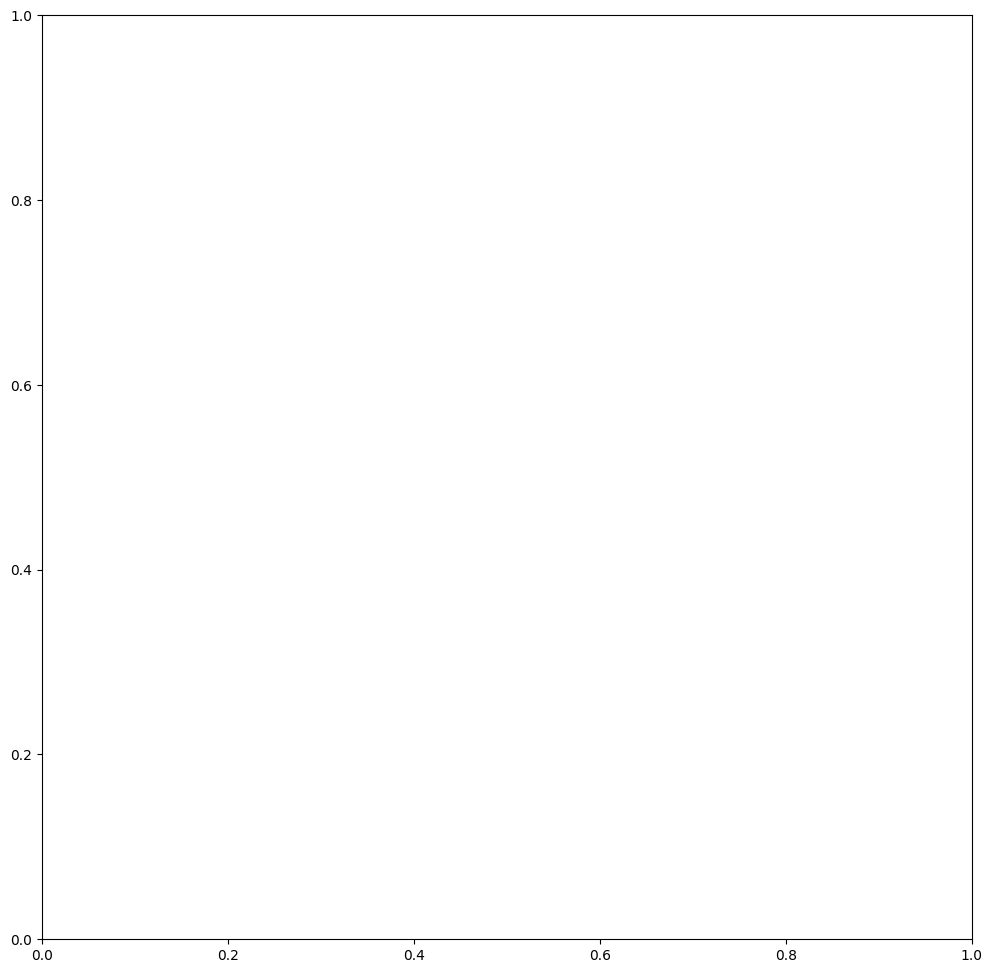

In [9]:
fig, ax=plt.subplots(figsize=(12,12))
fig

In [10]:
# finding the correlation
def plot_corr(df,size=12):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    cmap="plasma"
    ax.matshow(corr,cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
    plt.yticks(range(len(corr.columns)),corr.columns)

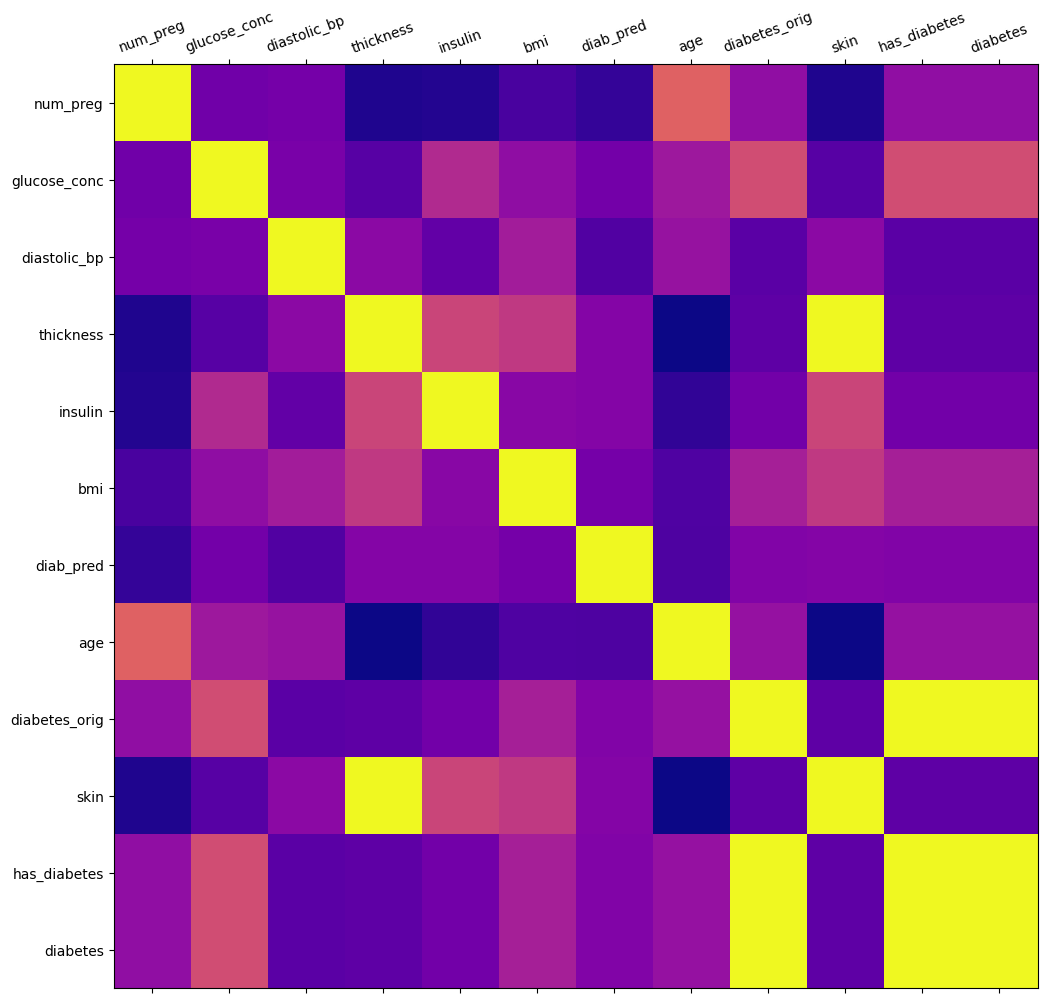

In [11]:
plot_corr(df)

In [12]:
## find the corelation between two columns
#1 thickness and skin columns
#2 has_diabtees and diabetes_origin
#3 diabtes and diabetes_origin 

In [13]:
# drop the columns
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

In [14]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,False
764,2,122,70,0,36.8,0.340,27,1.0638,False
765,5,121,72,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,30.1,0.349,47,0.0000,True


In [15]:
def plot_corr(df,size=12):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    cmap="plasma"
    ax.matshow(corr,cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
    plt.yticks(range(len(corr.columns)),corr.columns)

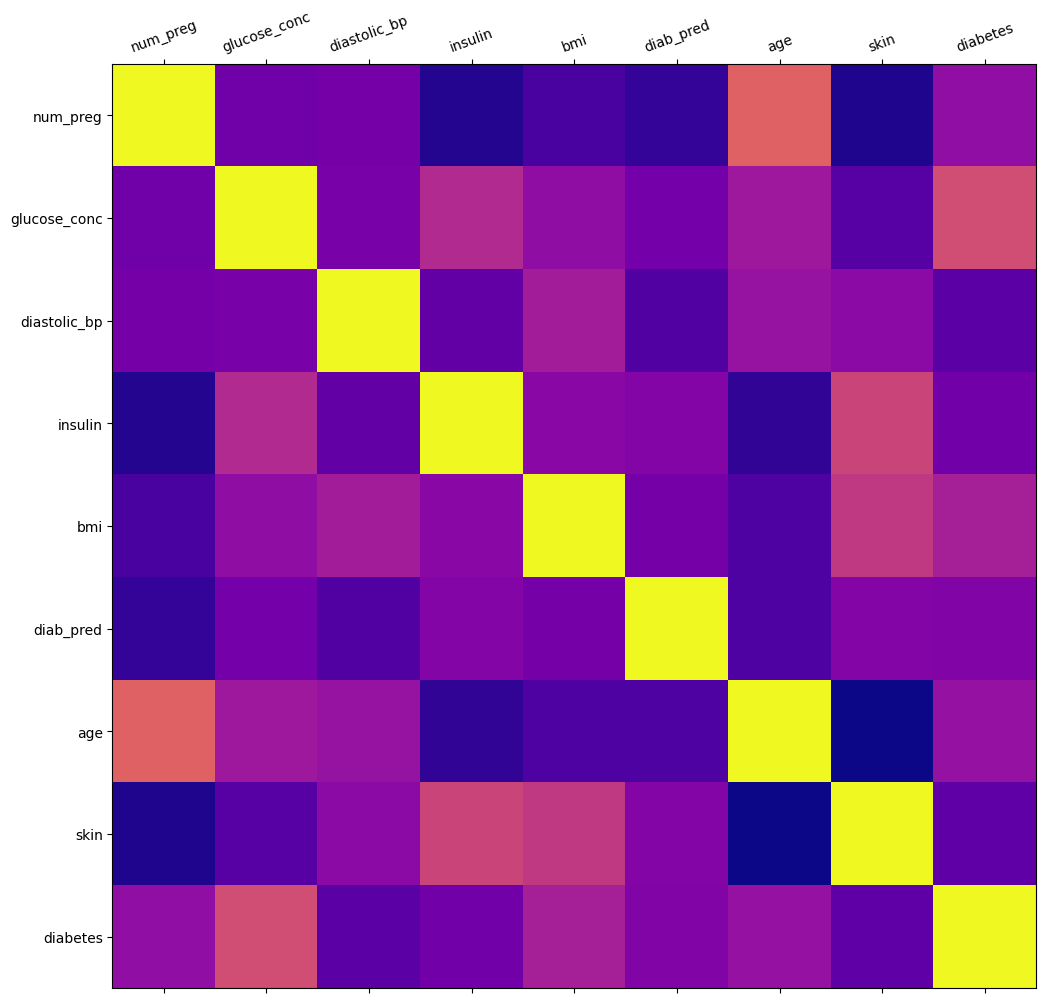

In [16]:
plot_corr(df)

In [17]:
#4 convert text to integer
df['diabetes'].unique()

array([ True, False])

In [18]:
dict1={'diabetes':[True,False]}
dict2={'diabetes':[1,0]}
df.replace(dict1,dict2,inplace=True)

In [19]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,0
764,2,122,70,0,36.8,0.340,27,1.0638,0
765,5,121,72,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,30.1,0.349,47,0.0000,1


In [20]:
# check the properties
num_true=len(df.loc[df['diabetes']==1])
num_false=len(df.loc[df['diabetes']==0])
print(f"num_true values {num_true}")
print(f"num_false values {num_false}")
per_num_true=num_true/(num_true+num_false)*100
per_num_false=num_false/(num_true+num_false)*100
print(per_num_true)
print(per_num_false)


num_true values 268
num_false values 500
34.89583333333333
65.10416666666666


# step3: Train test split

In [21]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [22]:
## a split the data
from sklearn.model_selection import train_test_split

input_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred',
                 'age', 'skin']

output_columns = ['diabetes']
x = df[input_columns].values
y = df[output_columns].values
spilt_test_size = 0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = spilt_test_size,random_state=42)


print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[  1.      95.      60.     ...   0.26    22.       0.7092]
 [  5.     105.      72.     ...   0.159   28.       1.1426]
 [  0.     135.      68.     ...   0.365   24.       1.6548]
 ...
 [ 10.     101.      86.     ...   1.136   38.       1.4578]
 [  0.     141.       0.     ...   0.205   29.       0.    ]
 [  0.     125.      96.     ...   0.262   21.       0.    ]]
[[6.0000e+00 9.8000e+01 5.8000e+01 ... 4.3000e-01 4.3000e+01 1.3002e+00]
 [2.0000e+00 1.1200e+02 7.5000e+01 ... 1.4800e-01 2.1000e+01 1.2608e+00]
 [2.0000e+00 1.0800e+02 6.4000e+01 ... 1.5800e-01 2.1000e+01 0.0000e+00]
 ...
 [0.0000e+00 1.2700e+02 8.0000e+01 ... 8.0400e-01 2.3000e+01 1.4578e+00]
 [6.0000e+00 1.0500e+02 7.0000e+01 ... 1.2200e-01 3.7000e+01 1.2608e+00]
 [5.0000e+00 7.7000e+01 8.2000e+01 ... 1.5600e-01 3.5000e+01 1.6154e+00]]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [24]:
# check the training propertion and testing propertion
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in testing set'.format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in testing set


In [25]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==1]),
                                             (len(y_train[y_train[ : ]==1])/len(y_train))*100))
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==0]),
                                             (len(y_train[y_train[ : ]==0])/len(y_train))*100))

print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==1]),
                                             (len(y_train[y_train[ : ]==1])/len(y_train))*100))
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==0]),
                                             (len(y_train[y_train[ : ]==0])/len(y_train))*100))                                           

training true:188 (35.01%)
training false:349 (64.99%)
training true:188 (35.01%)
training false:349 (64.99%)


##  step 4 : post split preparation

In [26]:
# count number of rows if zeros is present in each column

In [27]:
print('# rows in dataframev{0}'.format(len(df)))
print('number of rows missing in num_preg{0}'.format(len(df.loc[df['num_preg']==0])))
print('number of rows missing in glucose_conc{0}'.format(len(df.loc[df['glucose_conc']==0])))
print('number of rows missing in diastotlic_bp{0}'.format(len(df.loc[df['diastolic_bp']==0])))
print('number of rows missing in diabetes {0}'.format(len(df.loc[df['diabetes']==0])))
print('number of rows missing in insulin {0}'.format(len(df.loc[df['insulin']==0])))
print('number of rows missing in bmi {0}'.format(len(df.loc[df['bmi']==0])))
print('number of rows missing in diab_pred {0}'.format(len(df.loc[df['diab_pred']==0])))
print('number of rows missing in age{0}'.format(len(df.loc[df['age']==0])))
print('number of rows missing in skin{0}'.format(len(df.loc[df['skin']==0])))

# rows in dataframev768
number of rows missing in num_preg111
number of rows missing in glucose_conc5
number of rows missing in diastotlic_bp35
number of rows missing in diabetes 500
number of rows missing in insulin 374
number of rows missing in bmi 11
number of rows missing in diab_pred 0
number of rows missing in age0
number of rows missing in skin227


In [28]:
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy="mean")
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

In [29]:
x_train[0:5]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 1.66000000e+02,
        3.31000000e+01, 1.60000000e-01, 2.80000000e+01, 8.27400000e-01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 8.30000000e+01,
        4.33000000e+01, 1.83000000e-01, 3.30000000e+01, 1.49720000e+00]])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
x_tarin=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## step 5 Training the model

In [32]:
from sklearn.naive_bayes import GaussianNB

nb_model= GaussianNB() #create object GaussianNB class
nb_model.fit(x_train,y_train.ravel())#trainng a mode

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [33]:
from sklearn import metrics
nb_predict_model=nb_model.predict(x_train)
print(f'predicted accuracy{metrics.accuracy_score(y_train,nb_predict_model)}')

predicted accuracy0.7541899441340782


In [34]:
nb_predict_test = nb_model.predict(x_test)
print(f'predicted accuracy{metrics.accuracy_score(y_test,nb_predict_test)}')

predicted accuracy0.6536796536796536


## step 6 test the model

In [35]:

print('confusion matrix')
print(f"{metrics.confusion_matrix(y_test,nb_predict_test)}")

confusion matrix
[[150   1]
 [ 79   1]]


## traning random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train.ravel())

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [37]:
from sklearn import metrics
rf_predict_model=rf_model.predict(x_train)
print(f'predicted accuracy{metrics.accuracy_score(y_train,rf_predict_model)}')

predicted accuracy1.0


In [38]:
rf_predict_test=rf_model.predict(x_test)
print(f'predicted accuracy{metrics.accuracy_score(y_test,rf_predict_test)}')

predicted accuracy0.6536796536796536


In [39]:
print('confusion matrix')
print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

confusion matrix
[[151   0]
 [ 80   0]]


In [40]:
print('classification report')
print(f"{metrics.classification_report(y_test,rf_predict_test)}")

classification report
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



In [41]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbor=KNeighborsClassifier()
k_neighbor.fit(x_train,y_train.ravel())

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [42]:
from sklearn import metrics
kn_predict_model=k_neighbor.predict(x_train)
print(f'predicted accuracy{metrics.accuracy_score(y_train,kn_predict_model)}')

predicted accuracy0.8044692737430168


In [43]:
kn_predict_test=k_neighbor.predict(x_test)
print(f'accuracy={metrics.accuracy_score(y_test,kn_predict_test)}')

accuracy=0.6536796536796536


In [44]:
print('confusion matrix')
print(f"=\n{metrics.confusion_matrix(y_test,kn_predict_test)}")

confusion matrix
=
[[151   0]
 [ 80   0]]


In [45]:
print('classification report')
print(f"{metrics.classification_report(y_test,kn_predict_test)}")

classification report
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231

